GATHER DATA  BY MOUNTING GOOGLE DRIVE

In [1]:
from google.colab import drive
drive.mount('/content/drive/')
#change working directory
import os
os.chdir('/content/drive/MyDrive/pizza_sales_analysis_py/')
print(os.getcwd())



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/pizza_sales_analysis_py


**DATA loading**

In [2]:
import pandas as pd
pizzas  = pd.read_csv("./pizzas.csv")
order_details = pd.read_csv("./order_details.csv")
orders = pd.read_csv("./orders.csv")
# pizza_types = pd.read_csv("./pizza_types.csv")

#printing the table characteristics
print(pizzas.head())
print(pizzas.info())

print(orders.head())
print(orders.info())

print(order_details.head())
print(order_details.info())

     pizza_id pizza_type_id size  price
0   bbq_ckn_s       bbq_ckn    S  12.75
1   bbq_ckn_m       bbq_ckn    M  16.75
2   bbq_ckn_l       bbq_ckn    L  20.75
3  cali_ckn_s      cali_ckn    S  12.75
4  cali_ckn_m      cali_ckn    M  16.75
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB
None
   order_id        date      time
0         1  2015-01-01  11:38:36
1         2  2015-01-01  11:57:40
2         3  2015-01-01  12:12:28
3         4  2015-01-01  12:16:31
4         5  2015-01-01  12:21:30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null C

In [3]:
#  Load the CSV file; ingredients are separated with commas so loaded using delimiter
file_path = "./pizza_types.csv"
pizza_types = pd.read_csv(file_path, delimiter=',', quotechar='"')
#displaying the dataset
print(pizza_types.head())
print(pizza_types.info())

  pizza_type_id                          name category  \
0       bbq_ckn    The Barbecue Chicken Pizza  Chicken   
1      cali_ckn  The California Chicken Pizza  Chicken   
2   ckn_alfredo     The Chicken Alfredo Pizza  Chicken   
3     ckn_pesto       The Chicken Pesto Pizza  Chicken   
4    southw_ckn   The Southwest Chicken Pizza  Chicken   

                                         ingredients  
0  Barbecued Chicken, Red Peppers, Green Peppers,...  
1  Chicken, Artichoke, Spinach, Garlic, Jalapeno ...  
2  Chicken, Red Onions, Red Peppers, Mushrooms, A...  
3  Chicken, Tomatoes, Red Peppers, Spinach, Garli...  
4  Chicken, Tomatoes, Red Peppers, Red Onions, Ja...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3  

TASKS
1. Identify the  time at which we are getting high orders ?
and the time at which we get low orders ?
2. Identify which day of the week we are getting the most orders ?
3. total sales ?
4. which pizza ordered most and the revenue ?
5. Which time of the day people ordering most like morning ,Afternoon , evening ?
6. Top selling category ?

***Data preprocessing***

In [4]:
# 3. total sales
total_sales = order_details["quantity"].sum()

print("The total pizza sales : ",total_sales)


The total pizza sales :  49574


The top 5 selling pizzas: 
          pizza_id  total_quantity_sold
3      big_meat_s                 1914
80     thai_ckn_l                 1410
20  five_cheese_l                 1409
21  four_cheese_l                 1316
18  classic_dlx_m                 1181


<ipython-input-5-870d0ea3634e>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  h  = sns.barplot(x='pizza_id', y='total_quantity_sold', data = top_20, palette='viridis')


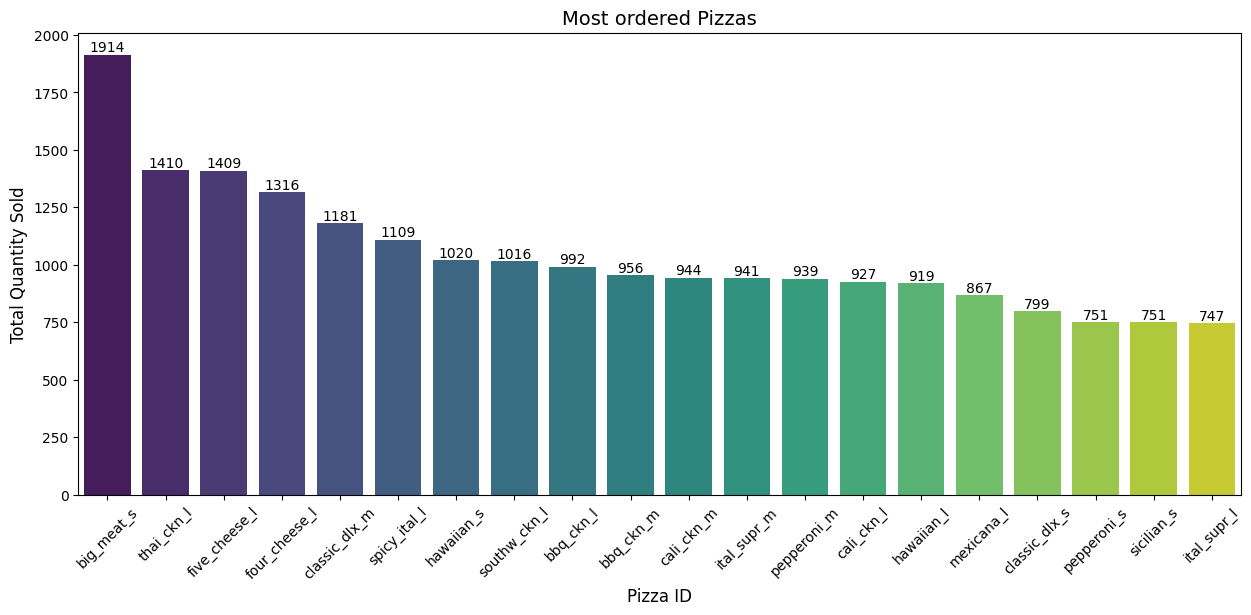

In [5]:
"""Most ordered pizza"""
# print(order_details.head())

import seaborn as sns
import matplotlib.pyplot as plt


# Group by 'pizza_id' and sum the 'quantity' for each pizza
pizza_sales = order_details.groupby('pizza_id')['quantity'].sum().reset_index()

# Rename columns for clarity
pizza_sales.columns = ['pizza_id', 'total_quantity_sold']
pizza_sales = pizza_sales.sort_values(by='total_quantity_sold', ascending=False)

# Descending order by total sales
top_20 = pizza_sales.head(20)

# Display the pizza sales data
print("The top 5 selling pizzas: \n",pizza_sales.head(5))

# Create a barplot using seaborn
plt.figure(figsize=(15, 6))
h  = sns.barplot(x='pizza_id', y='total_quantity_sold', data = top_20, palette='viridis')
for  k  in h.containers:
      h.bar_label(k,label_type="edge")
# Set plot labels and title
plt.title('Most ordered Pizzas', fontsize=14)
plt.xlabel('Pizza ID', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)

# Show the plot
plt.xticks(rotation=45)  # Rotate the x labels if necessary
plt.show()


The least selling pizzas: 
           pizza_id  total_quantity_sold
87   the_greek_xxl                   28
23  green_garden_l                   95
13   ckn_alfredo_s                   96
7      calabrese_s                   99
43      mexicana_s                  162


<ipython-input-6-84986a8ef6ae>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  l = sns.barplot(x='pizza_id', y='total_quantity_sold', data = lowest_20, palette='crest')


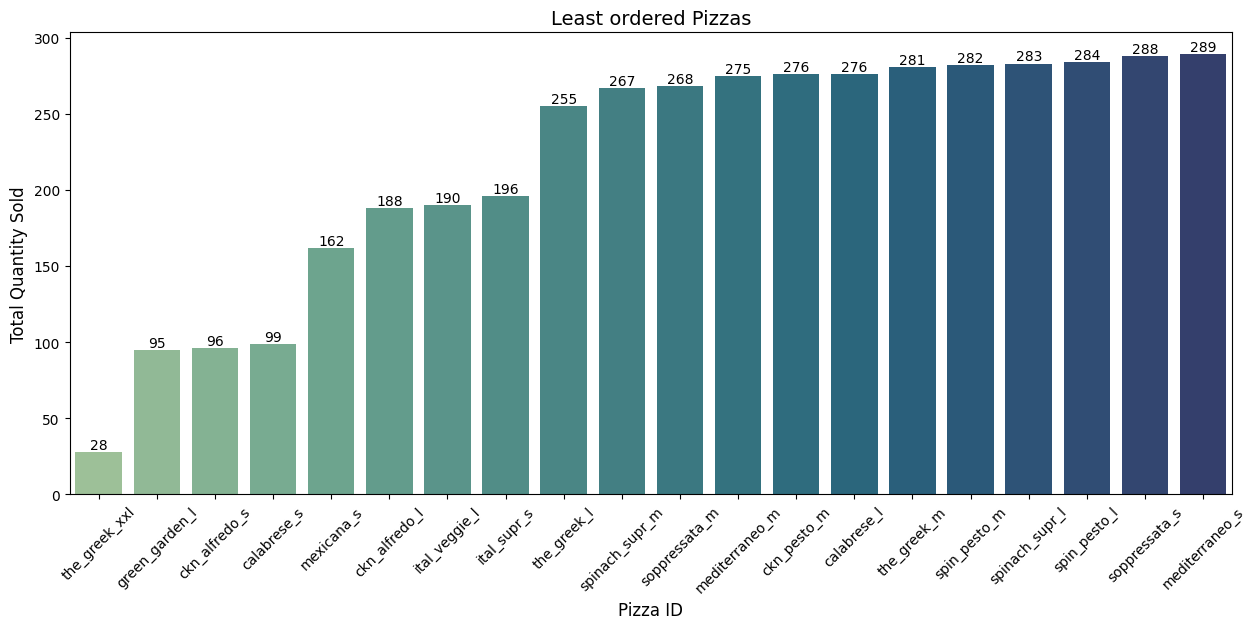

In [6]:
"""Least ordered pizzas"""
#accesing  lowest 20 rows in pizza sales
lowest_20 = (pizza_sales.tail(20)).sort_values(by='total_quantity_sold', ascending=True)
                                   #taken lowest 20 and sorted in ascending order wrt total_quantity sold
print("The least selling pizzas: \n", lowest_20.head(5))
# Create a barplot using seaborn
plt.figure(figsize=(15, 6))
l = sns.barplot(x='pizza_id', y='total_quantity_sold', data = lowest_20, palette='crest')
for i in l.containers:
  l.bar_label(i,label_type= "edge")
# Set plot labels and title
plt.title('Least ordered Pizzas', fontsize=14)
plt.xlabel('Pizza ID', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)

# Show the plot
plt.xticks(rotation=45)  # Rotate the x labels if necessary
plt.show()


In [7]:
"""4. which pizza ordered most and revenue generated? """
# print(pizzas.head(10)) #checked oolumns of pizzas dataset

#merging the pizza sales and pizzas table to know the price for each pizza
sales_revenue = pd.merge(pizza_sales,pizzas,left_on = "pizza_id",right_on = "pizza_id",how ="inner")

# calculatIng revenue generated
sales_revenue["Revenue"] = sales_revenue["total_quantity_sold"] * sales_revenue["price"]
# print(sales_revenue.head(3))

#slicing the first row , 5th column element
print("The most ordered pizza : ",sales_revenue.iloc[0,0])
print("The total revenue generated by most sold pizza: ",sales_revenue.iloc[0,5],"$")


The most ordered pizza :  big_meat_s
The total revenue generated by most sold pizza:  22968.0 $


   order_id        date      time
0         1  2015-01-01  11:38:36
1         2  2015-01-01  11:57:40
2         3  2015-01-01  12:12:28
3         4  2015-01-01  12:16:31
4         5  2015-01-01  12:21:30
5         6  2015-01-01  12:29:36
6         7  2015-01-01  12:50:37
7         8  2015-01-01  12:51:37
8         9  2015-01-01  12:52:01
9        10  2015-01-01  13:00:15
  time_period  number_of_orders
0     Morning              1240
1   Afternoon              7915
2     Evening              8664
3       Night              3531


<ipython-input-8-37437b07b6f3>:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orders_by_time_period = orders.groupby('time_period')['order_id'].count().reset_index()


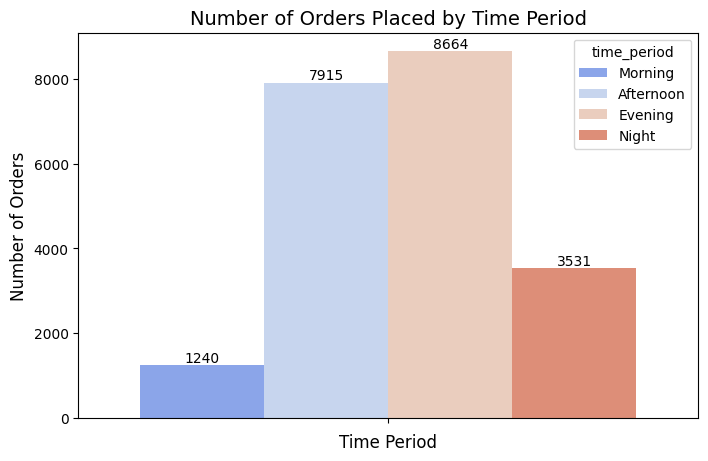

In [8]:
"""Track the orders by time"""
print(orders.head(10))

import pandas as pd
# Define a function to categorize time into morning, afternoon, and evening
def categorize_time(row):
    hour = int(row.split(':')[0])  # Extract the hour part from the time column
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 20:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create a new column 'time_period'
orders['time_period'] = orders['time'].apply(categorize_time)

# Ensure that the 'time_period' follows the desired order
time_period_order = ['Morning','Afternoon','Evening','Night']
orders['time_period'] = pd.Categorical(orders['time_period'], categories=time_period_order, ordered=True)

# Group by 'time_period' and count the number of orders for each period
orders_by_time_period = orders.groupby('time_period')['order_id'].count().reset_index()

# Rename columns for clarity
orders_by_time_period.columns = ['time_period', 'number_of_orders']

# Display the results
print(orders_by_time_period)

# Optional: Plot the results
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
o = sns.barplot(hue='time_period', y='number_of_orders',data=orders_by_time_period, palette="coolwarm")

for i in o.containers:
  o.bar_label(i,label_type = "edge")

plt.title('Number of Orders Placed by Time Period', fontsize=14)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

plt.show()

  day_of_week  number_of_orders
1      Monday              2794
5     Tuesday              2973
6   Wednesday              3024
4    Thursday              3239
0      Friday              3538
2    Saturday              3158
3      Sunday              2624


<ipython-input-9-042a13f29176>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x = 'day_of_week',y='number_of_orders',data = orders_by_day,palette = "magma")


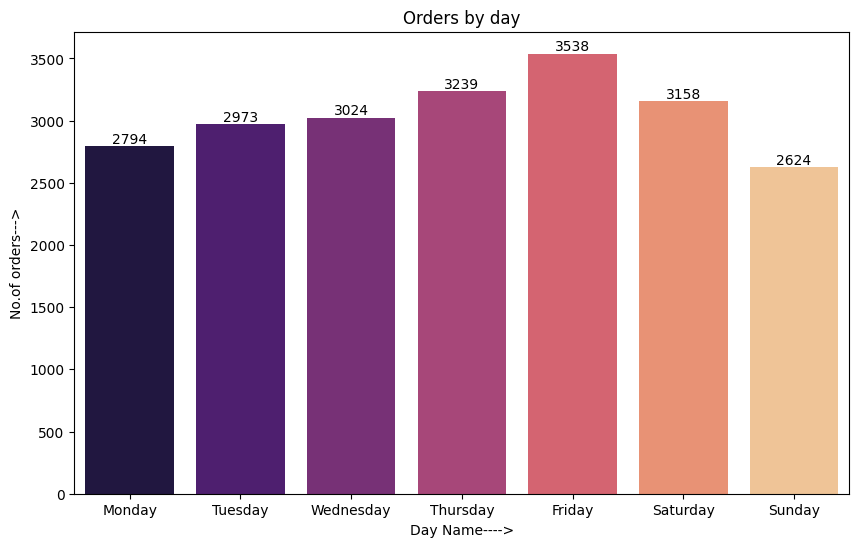

In [9]:
#Sales by Day of the week
#converting date column to datetime object
orders['date'] = pd.to_datetime(orders['date'])

# Extract the day of the week (0=Monday, 6=Sunday)
orders['day_of_week']=orders['date'].dt.day_name()

# Group by 'day_of_week' and count the number of orders for each day
orders_by_day = orders.groupby('day_of_week')['order_id'].count().reset_index()


# Rename columns for clarity
orders_by_day.columns=['day_of_week','number_of_orders']

# To ensure the days of the week are in order (Monday to Sunday)
days_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
orders_by_day['day_of_week'] = pd.Categorical(orders_by_day['day_of_week'],categories=days_order,ordered=True)

# Sort the DataFrame by the correct day order
orders_by_day = orders_by_day.sort_values('day_of_week')

#display the result
print(orders_by_day)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
g = sns.barplot(x = 'day_of_week',y='number_of_orders',data = orders_by_day,palette = "magma")

# Add data labels to the bars
for i in g.containers:
    g.bar_label(i, label_type='edge')

plt.title("Orders by day")
plt.xlabel("Day Name---->")
plt.ylabel("No.of orders--->")
plt.show()

The Hot selling category : Classic

   category  No_of_pizza_ordered
1  Classic                14579
2  Supreme                11777
3   Veggie                11449
0  Chicken                10815


<ipython-input-10-35052f4c06db>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x = 'category',y='No_of_pizza_ordered',data = orders_by_category,palette = "magma")


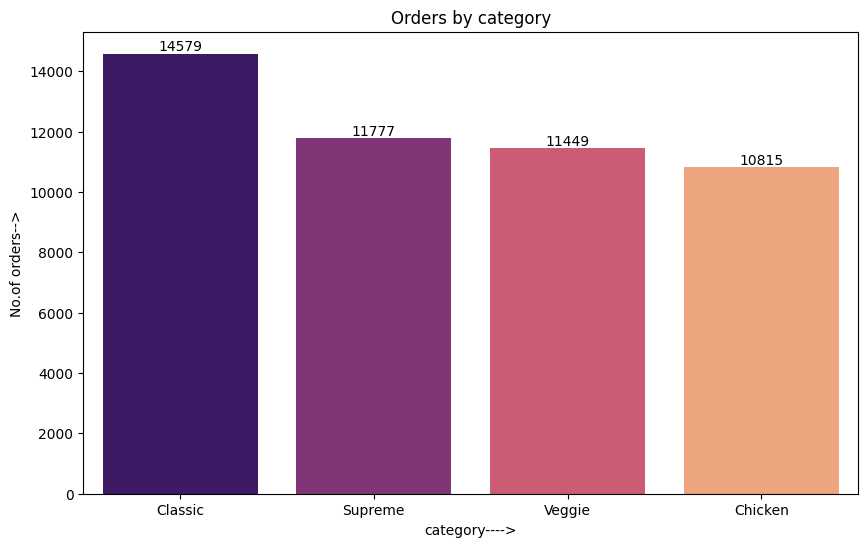

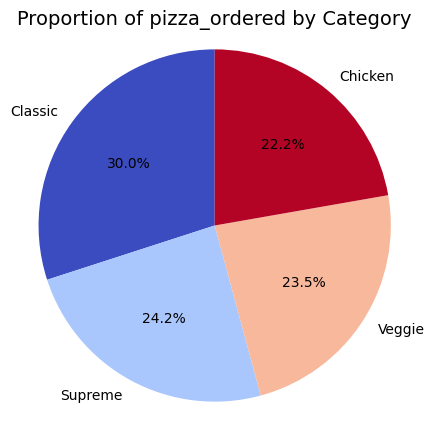

In [10]:
# print(order_details.head())
# print(pizzas.head())
# print(pizza_types.head())
# print(sales_revenue.head())

#first merging order_details and pizzas datasets
join1 = pd.merge(order_details,pizzas,left_on = "pizza_id",right_on = "pizza_id",how = 'inner')

#removing the columns price,pizza_id, Order_id, size
join1 = join1.drop('price',axis = 1)
join1 = join1.drop ('pizza_id',axis=1)
join1 = join1.drop ('order_id',axis=1)
join1 = join1.drop ('size',axis=1)
# print(join1.head())

#join 1st merged table with pizza Types
join2 = pd.merge(join1,pizza_types,left_on = 'pizza_type_id',right_on= 'pizza_type_id',how='inner')

#drop ingredients column
join2 = join2.drop('ingredients',axis = 1)
# print(join2.head())

# group by category and calculate no_of ordered pizzas
orders_by_category = join2.groupby('category')['order_details_id'].count().reset_index()

#name the columns
orders_by_category.columns = ['category','No_of_pizza_ordered']

#sort by descending order of NO_of_pizza_ordered
orders_by_category = orders_by_category.sort_values(by='No_of_pizza_ordered', ascending=False)

#displaying Hot selling category and orders by category table
print("The Hot selling category :",orders_by_category.iloc[0,0])
print("\n",orders_by_category)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

 #plot with bargraph
plt.figure(figsize=(10,6))
g = sns.barplot(x = 'category',y='No_of_pizza_ordered',data = orders_by_category,palette = "magma")

#adding data labels ,title,xlabel and ylabel
for i in g.containers:
    g.bar_label(i,label_type='edge')
plt.title("Orders by category")
plt.xlabel("category---->")
plt.ylabel("No.of orders-->")
plt.show()

""" New pie chart"""
# Data for pie chart
labels = orders_by_category['category']
sizes = orders_by_category['No_of_pizza_ordered']
# Generate colors using the coolwarm colormap
colors = plt.cm.coolwarm(np.linspace(0, 1, len(labels)))

# Create the pie chart
plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors = colors)

# Equal aspect ratio ensures the pie is drawn as a circle.
plt.axis('equal')

# Title for the plot
plt.title('Proportion of pizza_ordered by Category', fontsize=14)

# Display the plot
plt.show()


   order_details_id  order_id       pizza_id  quantity       date      time  \
0                 1         1     hawaiian_m         1 2015-01-01  11:38:36   
1                 2         2  classic_dlx_m         1 2015-01-01  11:57:40   
2                 3         2  five_cheese_l         1 2015-01-01  11:57:40   
3                 4         2    ital_supr_l         1 2015-01-01  11:57:40   
4                 5         2     mexicana_m         1 2015-01-01  11:57:40   

  time_period day_of_week Month_of_year pizza_type_id size  price  
0     Morning    Thursday       January      hawaiian    M  13.25  
1     Morning    Thursday       January   classic_dlx    M  16.00  
2     Morning    Thursday       January   five_cheese    L  18.50  
3     Morning    Thursday       January     ital_supr    L  20.75  
4     Morning    Thursday       January      mexicana    M  16.00  
   Month_name   Revenue
4     January  69793.30
3    February  65159.60
7       March  70397.10
0       April  68736.

<ipython-input-41-2760f8a0cb92>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  m = sns.barplot(x = "Month_name",y = "Revenue",data = monthly_revenue,palette="coolwarm")


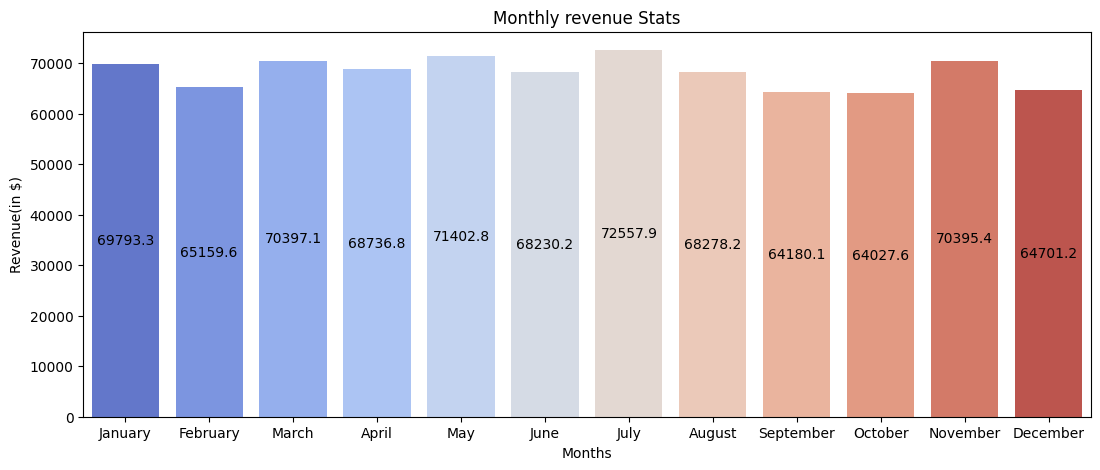

In [41]:
orders['Month_of_year']=orders['date'].dt.month_name()

# print(orders.head())
# print(sales_revenue.head())
# print(pizzas.head())
import pandas as pd

o_revenue1 = pd.merge(order_details,orders,left_on = "order_id",right_on="order_id",how ="inner")
# print(o_revenue1.head())

o_revenue2 = pd.merge(o_revenue1,pizzas,left_on = "pizza_id",right_on = 'pizza_id',how = 'inner')
print(o_revenue2.head())

o_revenue2['Revenue'] = o_revenue2['quantity'] * o_revenue2['price']

monthly_revenue = o_revenue2.groupby('Month_of_year')['Revenue'].sum().reset_index()
monthly_revenue.columns = ['Month_name','Revenue']


# To ensure the days of the week are in order (Monday to Sunday)
Month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_revenue['Month_name'] = pd.Categorical(monthly_revenue['Month_name'],categories=Month_order,ordered=True)

# Sort the DataFrame by the correct day order
monthly_revenue = monthly_revenue.sort_values('Month_name')

print(monthly_revenue)
print("\nThe average revenue in year(in $): ",monthly_revenue["Revenue"].mean())
plt.figure(figsize=(13,5))
m = sns.barplot(x = "Month_name",y = "Revenue",data = monthly_revenue,palette="coolwarm")

for j in m.containers:
  m.bar_label(j,label_type= "center")

plt.title("Monthly revenue Stats")
plt.xlabel("Months")
plt.ylabel("Revenue(in $)")
plt.show()

  size  sales
4  XXL     28
3   XL    552
2    S  14403
1    M  15635
0    L  18956


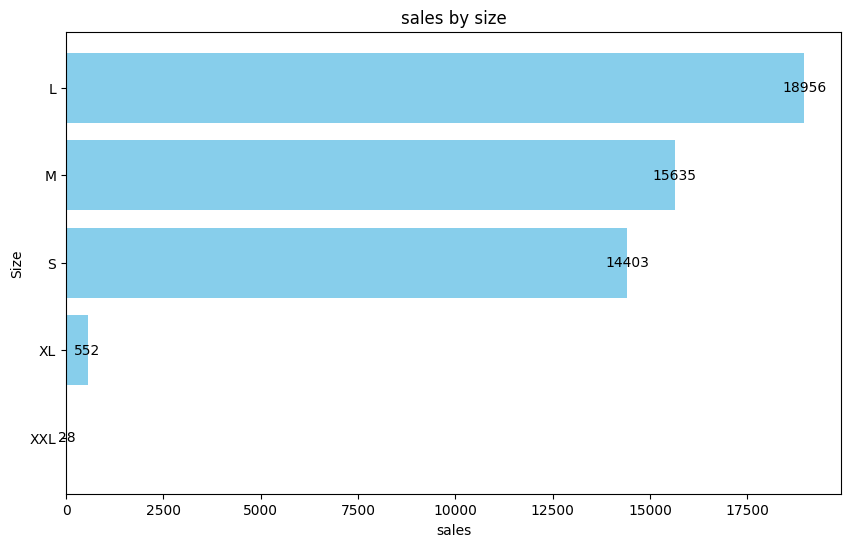

In [53]:
sales_by_size = o_revenue2.groupby("size")["quantity"].sum().reset_index()
sales_by_size.columns =  ["size","sales"]
sales_by_size = sales_by_size.sort_values(by='sales', ascending=True)

print(sales_by_size)

plt.figure(figsize = (10,6))
s = plt.barh(sales_by_size["size"],sales_by_size["sales"],color = 'skyblue')

for bar in s:
  plt.text(bar.get_width() + 1,  # x-coordinate for the text (slightly offset to the right)
             bar.get_y() + bar.get_height()/2,  # y-coordinate for the text (centered vertically)
             f'{bar.get_width():.0f}',  # The label showing the value of the bar
             va='center',  # Vertical alignment of the text
             ha='center',  # Horizontal alignment of the text
             fontsize=10)

plt.title("sales by size")
plt.xlabel("sales")
plt.ylabel("Size")
plt.show()